In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
y2015 = pd.read_csv('LoanStats3d.csv',skipinitialspace=True,header=1)

C:\Users\Will\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [4]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

## DRILL: Third Attempt

So here's your task. Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.

You'll want to do a few things in this process. First, dive into the data that we have and see which features are most important. This can be the raw features or the generated dummies. You may want to use PCA or correlation matrices.

Can you do it without using anything related to payment amount or outstanding principal? How do you know?

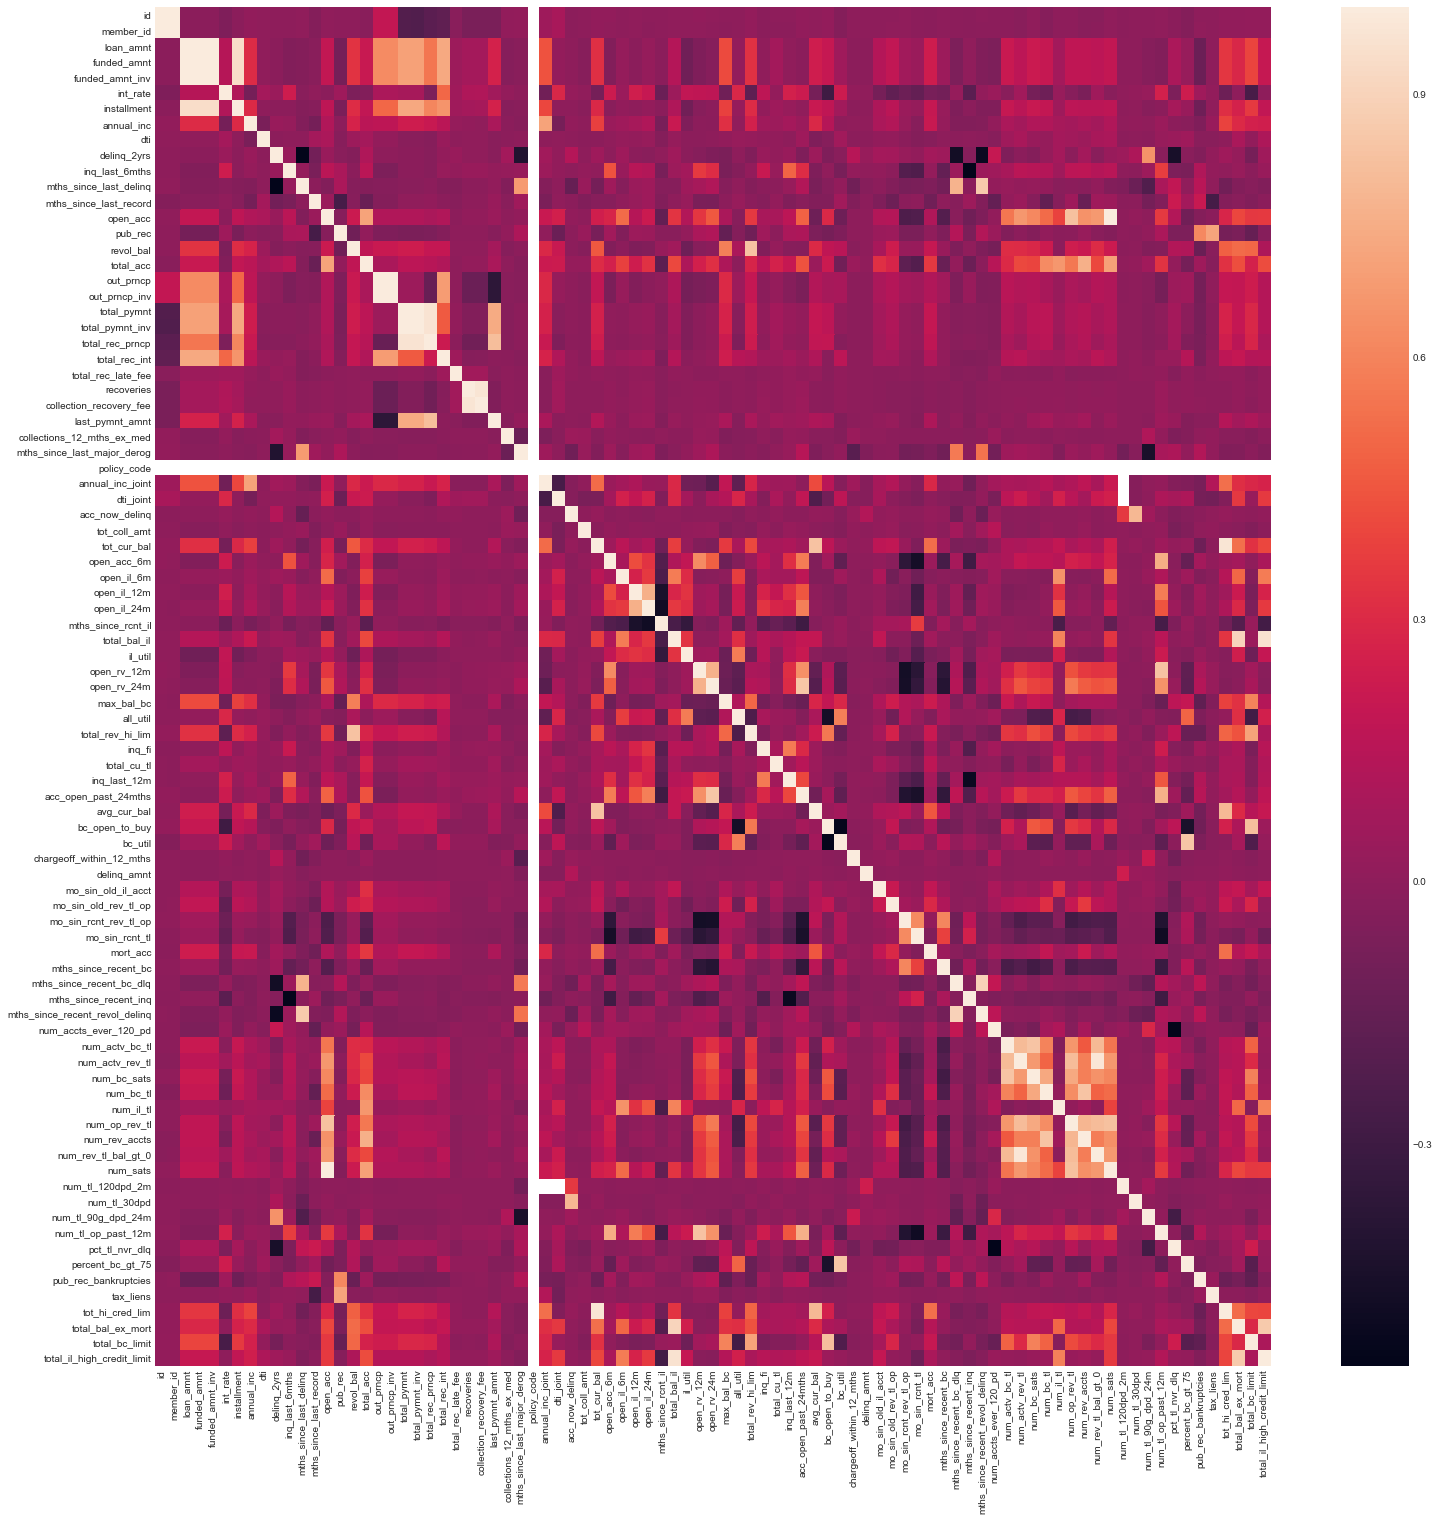

In [5]:
plt.figure(figsize=(25,25))
sns.heatmap(y2015.corr())
plt.show()

In [6]:
#Removing redudant features/highly correlated based on heatmap
y2015.drop(['id','funded_amnt','funded_amnt_inv','total_pymnt_inv','collection_recovery_fee','out_prncp_inv', 'total_rec_prncp'], 1,inplace=True)

#droping columns based on score before they are split into dummy columns
y2015.drop(['last_pymnt_d','last_credit_pull_d','next_pymnt_d', 'title', 'purpose',
            'grade', 'emp_length','issue_d','initial_list_status', 'verification_status',
            'home_ownership','application_type','pymnt_plan', 'verification_status_joint','policy_code',
            'acc_now_delinq','tax_liens','member_id', 'loan_amnt', 'int_rate', 'installment', 'annual_inc',
            'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_rec_int',
            'total_rec_late_fee', 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
            'acc_open_past_24mths', 'avg_cur_bal', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_rev_tl_op',
            'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
            'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0',
            'num_sats', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies',
            'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'term',
            'recoveries'], 1, inplace=True)

In [7]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

rfc.fit(X,Y)
score = rfc.feature_importances_

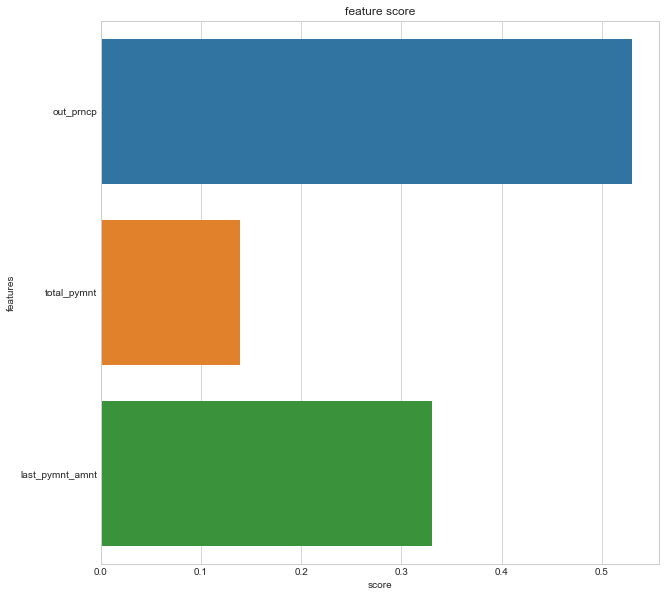

In [8]:
#ploting features and score
columns = list(X.columns)
feature_score = pd.DataFrame({'features':columns, 'score':score})

plt.figure(figsize=(10,10))
plt.title('feature score')
sns.barplot(y='features', x="score", data=feature_score)
plt.show()

In [9]:
newdf = feature_score[feature_score['score'] < 0.025]
low_score_columns = newdf['features']


#loop used to find features in X that were in y2015.
arr = []
for j in low_score_columns:
    for k in y2015.columns:
        if j == k:
            arr.append(j)

In [10]:
rfc2 = ensemble.RandomForestClassifier()
score = cross_val_score(rfc2, X, Y, cv=10)
score.mean()

0.92425988533630155

In [11]:
X.shape

(421095, 3)